# import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from sklearn.model_selection import train_test_split

# read data and understanding data

In [2]:
data =pd.read_csv("../input/students-adaptability-level-in-online-education/students_adaptability_level_online_education.csv")

display(data.sample(4))
display(data.info(),
        data.shape)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
176,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Wifi,3G,1-3,No,Mobile,Moderate
128,Girl,11-15,School,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
720,Girl,1-5,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
131,Boy,21-25,University,Government,Yes,No,High,Mid,Mobile Data,3G,1-3,No,Mobile,Low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


None

(1205, 14)

In [3]:
data.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [4]:
data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


# Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='Network Type', ylabel='count'>

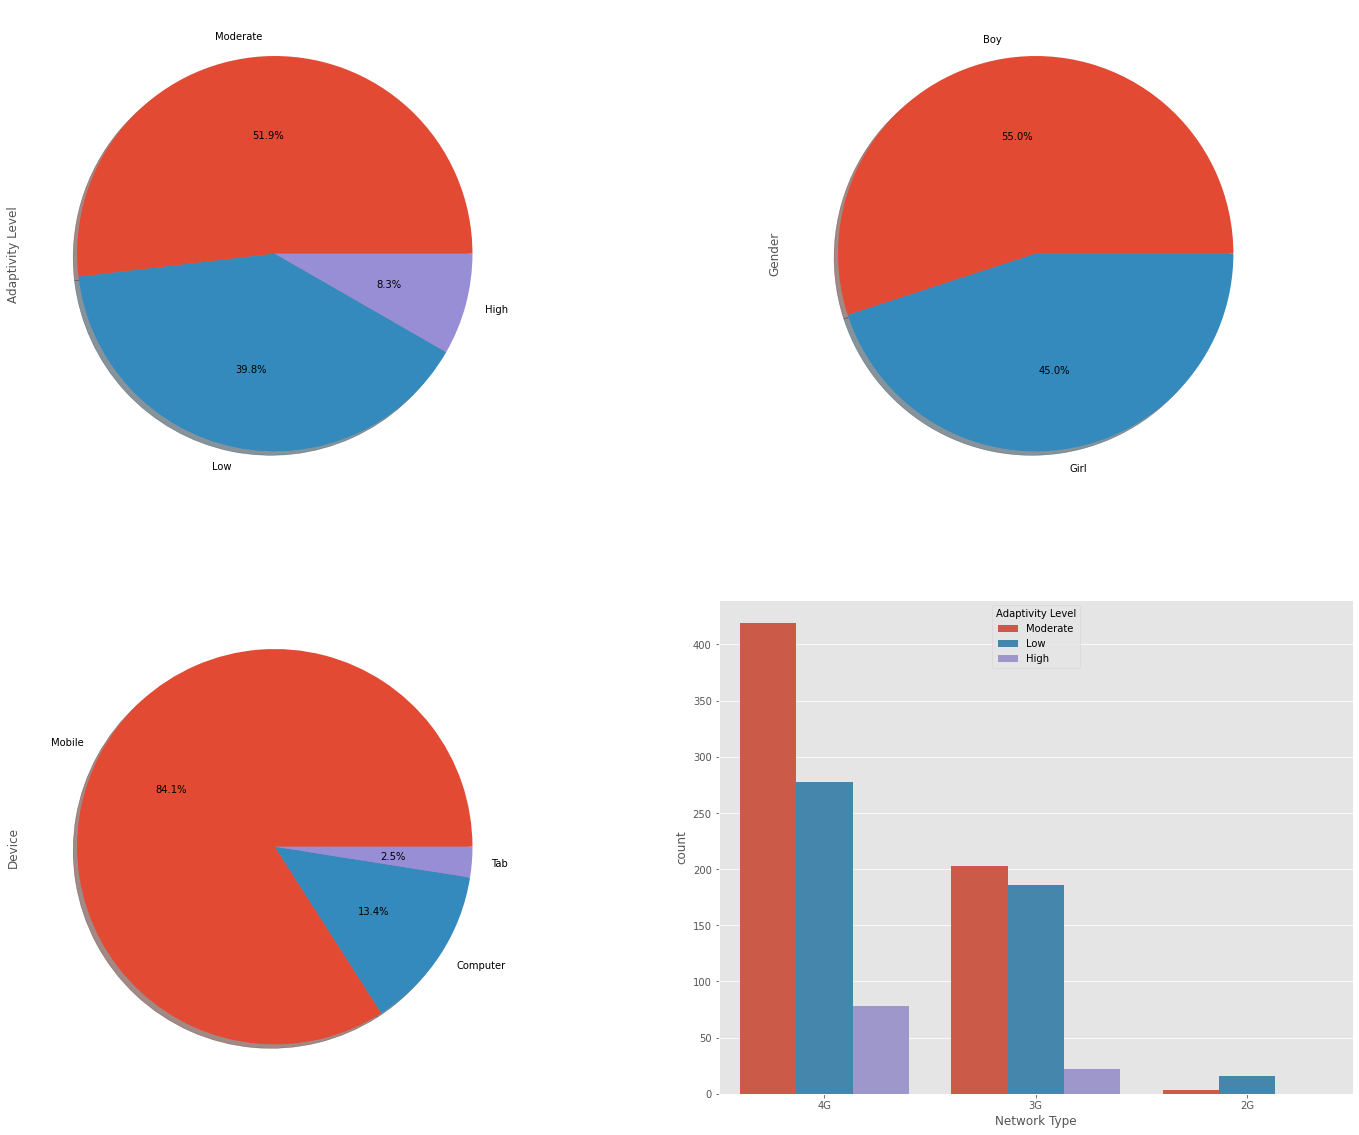

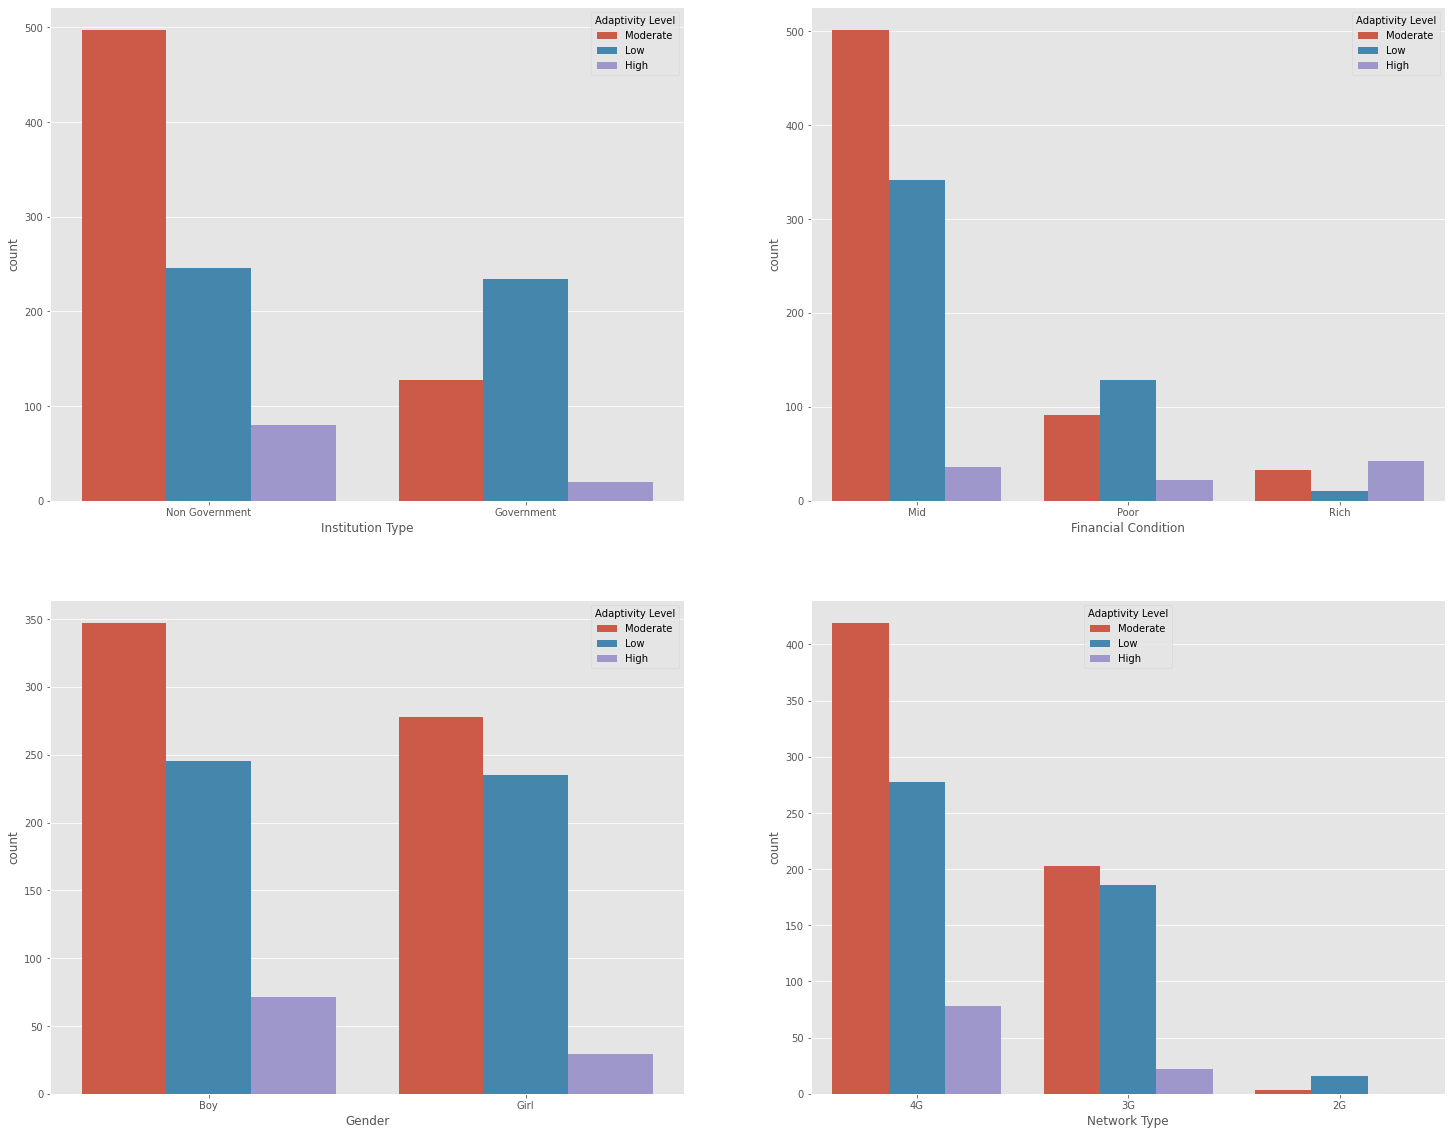

In [5]:
fig1 ,ax =plt.subplots(2,2,figsize=(25,20))

data['Adaptivity Level'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,ax=ax[0][0])
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,ax=ax[0][1])
data['Device'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,ax=ax[1][0])
sns.countplot(data["Network Type"],hue=data["Adaptivity Level"],ax=ax[1][1])
fig2 ,ax =plt.subplots(2,2,figsize=(25,20))
sns.countplot(data["Institution Type"],hue=data["Adaptivity Level"],ax=ax[0][0])
sns.countplot(data["Financial Condition"],hue=data["Adaptivity Level"],ax=ax[0][1])
sns.countplot(data["Gender"],hue=data["Adaptivity Level"],ax=ax[1][0])
sns.countplot(data["Network Type"],hue=data["Adaptivity Level"],ax=ax[1][1])

# preprocessing

In [6]:
def gethowmanyclass(col:list, data:pd.DataFrame) -> dict:
    return {i : [list(data[i].unique()),len(list(data[i].unique()))] for i in col}

def valeqno(dictob:dict, no:int) -> list:
    r = [i for i in range(len(list(dictob.values()))) if list(dictob.values())[i][1] == no]
    return [list(dictob.keys())[i] for i in range(len(list(dictob.keys()))) if i in r]

def encoding(col:list, data:pd.DataFrame) -> pd.DataFrame:
    new = data[col]
    for i in col:
        item = list(new[i].unique())
        for m in range(len(item)):
            new[i] = new[i].replace(item[m],m)
    data = new
    return data

s = gethowmanyclass(list(data.columns),
                data)
valeqno(s, 2)
data2 = data.drop('Adaptivity Level',axis=1)
data2 = encoding(list(data2.columns), data)
data['Adaptivity Level'] = data['Adaptivity Level'].replace(['Low','Moderate','High'],[0,1,2])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [7]:
data[list(data2.columns)] = data2
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,1,0,1,1,1,1
2,1,1,1,1,0,0,0,0,0,0,1,0,1,1
3,1,2,2,0,0,0,0,0,1,0,1,0,1,1
4,1,1,2,0,0,0,0,1,1,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,1,1,0,0,0,0,0,0,0,1,0,1,0
1201,1,1,1,0,0,1,1,0,0,0,0,0,1,1
1202,0,2,2,0,0,0,0,0,1,1,1,0,1,1
1203,1,1,1,0,0,1,0,0,0,0,1,0,1,0


# split data and scaling

In [8]:
X = data.drop(columns="Adaptivity Level")           
y = data["Adaptivity Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

max_ = X_train.max(axis=0)
min_ = X_train.min(axis=0)

df_train = (X_train - min_) / (max_ - min_)
df_valid = (X_test - min_) / (max_ - min_)

# deep learning module

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape = df_train.shape[1:]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100 , activation = 'selu',kernel_initializer = 'lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100 , activation = 'selu' , kernel_initializer = 'lecun_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3 , activation = 'softmax')
])

model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy ,
              optimizer = tf.keras.optimizers.Nadam() ,
              metrics = ['accuracy'])

model.fit(df_train , y_train , epochs = 50 ,
          callbacks = [tf.keras.callbacks.EarlyStopping(
              monitor='loss' ,mode = 'min', patience = 5
          )])

2022-09-29 04:37:10.614468: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-09-29 04:37:10.822222: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
29/29 [==============================] - 2s 3ms/step - loss: 1.0016 - accuracy: 0.5792
Epoch 2/50
29/29 [==============================] - 0s 3ms/step - loss: 0.8025 - accuracy: 0.6700
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 0.7199 - accuracy: 0.7198
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.7187
Epoch 5/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.7287
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6237 - accuracy: 0.7276
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.7386
Epoch 8/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.7630
Epoch 9/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.7663
Epoch 10/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.7553
Epoch 11/50
29/29 [

# evaluate

In [10]:
a , score = model.evaluate(df_valid , y_test)

print("The Score TF model :",score)

10/10 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.8212
The Score TF model : 0.8211920261383057


> # try same model with standerdscaler and show me res plz 